<a href="https://colab.research.google.com/github/vivianecunha/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/M%C3%B3dulo%2004/Trabalho%20M%C3%B3dulo%204/Trabalho_modulo_04_Bootcamp_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho Prático - Módulo 4**


**Objetivo:**
*   Classificar imagens através do uso de rede neural
*   Visão geral do uso do TensorFlow: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br


Usaremos o Keras para construir e treinar modelos no TensorFlow

In [1]:
#TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [3]:
#Importando a base de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# Carregando a base de dados que retorna quatro NumPy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Cada imagem é mapeada com um só label. Já que o nome das classes não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore os dados**

In [6]:
print(f'train images: {len(train_images)} \ntest images:  {len(test_images)}')

train images: 60000 
test images:  10000


In [7]:
# conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [8]:
# Cada label é um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# Todas as labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Pré-processe os dados**

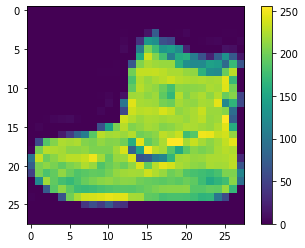

In [10]:
# Primeira imagem do conjunto de dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural.
train_images = train_images / 255.0

test_images = test_images / 255.0

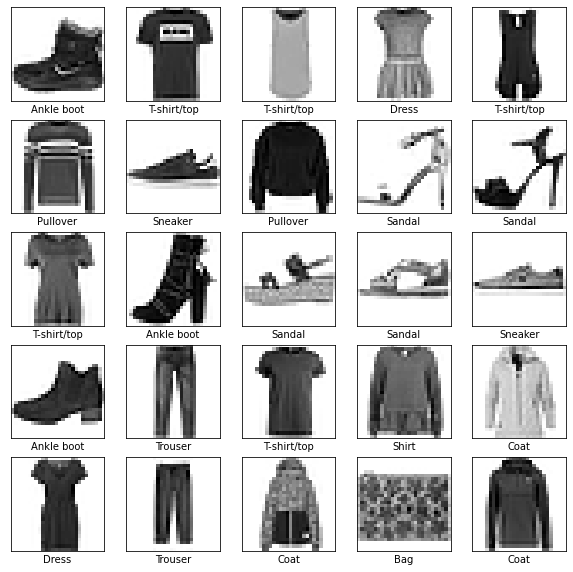

In [12]:
# Primeiras 25 imagens do conjunto de treinamento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Construindo o modelo**

1.   Montar o modelo

In [13]:
# Montar as camadas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2.   Compile o modelo

In [14]:
model.compile(optimizer='adam', #Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss
              loss='sparse_categorical_crossentropy',  #Loss mede quão preciso o modelo é durante o treinamento
              metrics=['accuracy'])  #usado para monitorar os passos de treinamento e teste

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Treine o modelo**

In [16]:
#Treine o modelo com o método fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3339 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2690 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

**Avalie a acurácia**

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3484 - accuracy: 0.8741

Test accuracy: 0.8741000294685364


**Faça predições**

In [18]:
#Para predições de algumas imagens
predictions = model.predict(test_images)

In [19]:
# Primeira pedição do conjunto. A predição é um array de 10 números
predictions[0]

array([6.0945595e-08, 2.6251537e-09, 8.4866713e-08, 1.4723348e-11,
       8.3165217e-09, 2.6020705e-05, 2.4485954e-07, 4.7248468e-04,
       9.3341592e-09, 9.9950111e-01], dtype=float32)

In [20]:
# Podemos ver cada label tem um maior valor de confiança.
# Então, o modelo é confiante de que essa imagem é uma bota (ankle boot) ou class_names[9]
np.argmax(predictions[0])

9

In [21]:
class_names[9]

'Ankle boot'

In [22]:
# Examinando a label do teste, vemos que essa classificação é correta
test_labels[0]

9

In [23]:
#Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

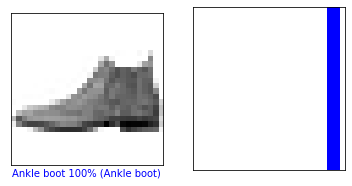

In [24]:
#Vamos olhar a previsão imagem na posição 0, do array de predição
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

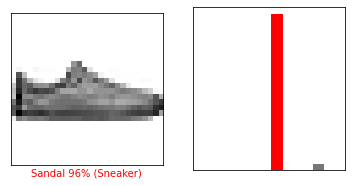

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

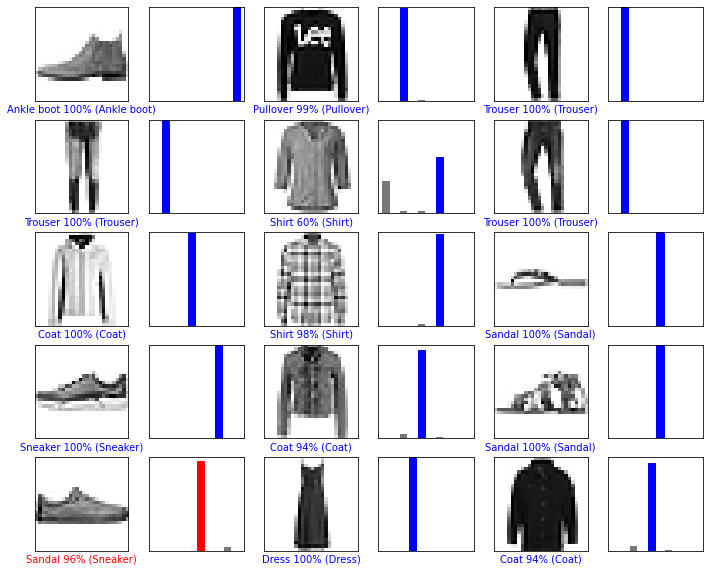

In [26]:
# Labels preditas corretamente são azuis e as predições erradas são vermelhas.
# O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [27]:
# Finamente, use o modelo treinado para fazer a predição de uma única imagem.
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [28]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
#Agora prediremos a label correta para essa imagem:
predictions_single = model.predict(img)

print(predictions_single)

[[6.0945474e-08 2.6251537e-09 8.4866713e-08 1.4723263e-11 8.3165066e-09
  2.6020682e-05 2.4485908e-07 4.7248445e-04 9.3341583e-09 9.9950111e-01]]


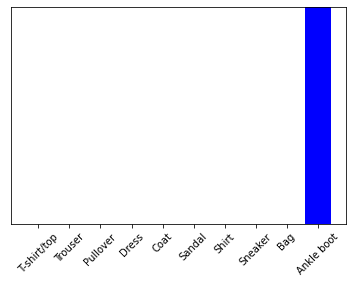

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
#Pegue a predição de nossa (única) imagem no batch:
np.argmax(predictions_single[0])

9

#Questionário




1.   Que tipo de Aprendizado foi utilizado no nosso problema?


*   Aprendizado por reforço.
*   ***Supervisionado.***
*   Semi-supervisionado.
*   Não supervisionado.







2.   O modelo lida com quantas classes?

*   7
*   9
*   8
*   ***10***

3.   Como os tipos de características foram identificadas?

*   ***Pelos descritores de forma.***
*   Pelos inversores de borda.
*   Pelas regressões logísticas de forma.
*   Pelos tradutores manuais de imagem.

4.   Podemos citar a análise utilizada aqui como:

*   ***Preditiva.***
*   Especialista.
*   Alternativa.
*   Retroativa.

5.   Pensando no conceito de Inteligência Artificial, podemos dizer que:

*  ***O sistema montado tenta pensar como humanos.***
*   O sistema montado tenta deduzir como máquinas.
*   O sistema montado repete instruções prévias.
*   O sistema montado não é capaz de generalizar.

6.   O desempenho do sistema deve melhorar não apenas na repetição da mesma tarefa, mas também nas tarefas similares do domínio. Portanto:

*   O aprendizado envolve a repetição linear a partir da experiência.
*   O aprendizado envolve a regressão a partir da experiência.
*   O aprendizado envolve a regressão a partir da observação.
*   O aprendizado envolve a generalização a partir da experiência.

7. O exemplo foi que tipo de inferência?

*   Classificativa.
*   ***Indutiva.***
*   Repetitiva.
*   Dedutiva.

8.   Nesse trabalho qual tipo de algoritmo foi usado para classificar?

*   Redes recorrentes.
*   ***Redes Neurais.***
*   SVM.
*   Regressão Logística.

9. Pelo uso do Flatten, podemos afirmar qual foi a rede utilizada?

*   Sim, foi um Perceptron Multicamada.
*   Sim, foi um Flatten por Reforço.
*   Não, pois o Flatten é algo inexistente.
*   ***Sim, foi uma Rede Neural CNN.***

10.   Para que serviu a função Loss no nosso modelo?

*   Maximiza a função para guiar o modelo para direção certa.
*   Otimiza a função para guiar o modelo para direção aleatória.
*   ***Minimiza a função para guiar o modelo para direção certa.***
*   Internaliza a função para guiar o modelo para direção certa.

11.   Para que serve o comando model.fit?

*   Verificar a acurácia.
*   Iniciar o modelo para carga.
*   Teste.
*   ***Treinamento.***

12. No treinamento do modelo, qual foi a acurácia da Epoch 5/10?

*   0,8252.
*   0,8114.
*   ***0,8914.***
*   0,08852.

13.   Qual foi a acurácia do modelo no teste?

*   0,313.
*   ***0,8811***
*   0,3418.
*   0,9811.

14.   Quantas imagens foram utilizadas para a etapa de predição?

*   2.
*   5.
*   ***1.***
*   4.

15.   Acerca do exemplo apresentado responda qual foi o resultado da classificação e se ela retornou o valor correto?

*   Label 8 de forma incorreta.
*   Label 8 de forma correta.
*   ***Label 9 de forma correta.***
*   Label 7 de forma correta.